# Case Study on Testing of Hypothesis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#reading the csv file
data=pd.read_csv(r"C:\Users\HP\Downloads\ICT-DS\Sales_add.csv")
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [4]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

### Q1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing


H0(Null Hypothesis): There is no increase in sales after stepping into digital marketing.

HA(Alternate Hypothesis):There is an increase in sales after stepping into digital marketing.


In [3]:
from scipy.stats import ttest_ind

In [5]:
t_stat,pval=ttest_ind(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])

In [6]:
pval

2.614368006904645e-16

In [7]:
if pval<0.05:
    print('Null Hypothesis is Rejected')
else:
    print('Null Hypothesis is Accepted')

Null Hypothesis is Rejected


Here H0 is rejected which means 'There is an increase in sales after stepping into digital marketing'.

### Q2:The company needs to check whether there is any dependency between the features “Region” and “Manager”.


   
H0:There is no dependency between "Region" and "Manager"
    
HA:There is dependency between "Region" and "Manager"


In [9]:
from scipy.stats import chi2_contingency

In [18]:
cont=pd.crosstab(data['Manager'],data['Region'])
cont

Region,Region - A,Region - B,Region - C
Manager,,,
Manager - A,4,4,1
Manager - B,3,1,3
Manager - C,3,2,1


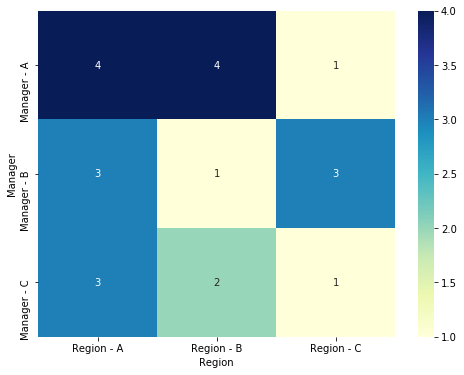

In [19]:
#heatmap for visual correlation of 2 columns(optional)
plt.figure(figsize=(8,6))
sns.heatmap(cont,annot=True,cmap='YlGnBu')

In [20]:
chi2_stat,p_val,dof,expo=chi2_contingency(cont)
p_val


0.5493991051158094

In [21]:
if p_val<0.05:
    print('Null Hypothesis is Rejected')
else:
    print('Null Hypothesis is Accepted')

Null Hypothesis is Accepted


Therefore, there is no dependency between "Region" and "Manager". 